In [1]:
import xport

In [2]:
import pandas as pd

# Merges columns in a singular csv file by ID number for yes or no questions - SEQN is the ID number for a person on NHANES

In [3]:
def create_df (file, columns,names):
    with open(file, 'rb') as f:
        df = xport.to_dataframe(f)
    df1=df['SEQN']
    df1=df1.to_frame()
    i=0
    for column in columns:
        df1=pd.merge(df1,df[(df[column]==2.0) | (df[column]==1.0)][['SEQN',column]],how='inner',on='SEQN')
        df1.replace({2.0:0 , 1.0:1}, inplace = True)
        df1.rename(columns={column: names[i]}, inplace = True)
        i+=1
    return df1


# Merges columns in a singular cvs file for non yes or no questions

In [4]:
def create_df2 (file, columns,names):
    with open(file, 'rb') as f:
        df = xport.to_dataframe(f)
    df1=df['SEQN']
    df1=df1.to_frame()
    i=0
    for column in columns:
        df1=pd.merge(df1,df[['SEQN',column]],how='inner',on='SEQN')
        df1.rename(columns={column: names[i]}, inplace = True)
        i+=1
    return df1

# Medical History - MCQ_H.XPT

In [5]:
x = ['MCQ220','MCQ010','MCQ160A','MCQ050','MCQ053','MCQ070','MCQ080','MCQ082','MCQ160N','MCQ160B','MCQ160C',
    'MCQ160D','MCQ160E','MCQ160F','MCQ160G','MCQ160O','MCQ203']
y = ['cancer','asthma','arthritis','emergency_care_asthma_pastyr','treatment_asthma_past_3months','psoriasis',
     'ever_overweight','ever_told_celiac','ever_told_had_a_gout','ever_told_congestive_heart_failure',
    'ever_told_coronary_heart_disease','ever_told_angina_angina/pectoris','ever_told_heart_attack',
     'ever_told_have_stroke','ever_told_emphysema','ever_told_copd','ever_told_jaundice']
answers1=create_df ('MCQ_H.XPT', x,y)



In [6]:
x = ['MCQ025','MCQ180A','MCQ180B','MCQ180N','MCQ180C','MCQ180D','MCQ180E','MCQ075','MCQ180F','MCQ180G','MCQ206']
y = ['age_diagnosed_asthma','age_diagnosed_arthritis','age_when_told_heart_failure',
    'age_when_had_gout','age_when_coronary_heart_disease','age_when_told_angina_angina/pectorias',
    'age_when_had_heart_attack','degree_of_psoriasis','age_when_had_stroke','age_when_told_emphysemia',
    'age_when_jaundice']
answersmany=create_df2 ('MCQ_H.XPT', x,y)


In [7]:
df1m=pd.merge(answers1,answersmany,how='inner',on='SEQN')

# EDA

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
def make_bar_graph (thing)
    objects = (f'have {thing} and cancer', f'do not have {thing} and have cancer')
    y_pos = np.arange(len(objects))
    performance = [len(answers1[(answers1[f'{thing}']==1) & (answers1['cancer']==1)][[f'{thing}','cancer']])]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)

    plt.show()

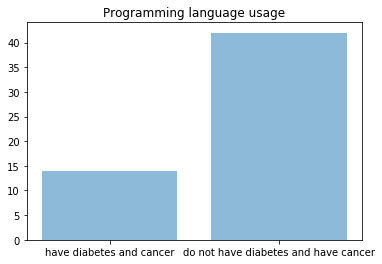

In [292]:
objects = (f'have diabetes and cancer', f'do not have diabetes and have cancer')
y_pos = np.arange(len(objects))
performance = [len(df1[(df1['told_diabetes']==1) & (df1['cancer']==1)][['told_diabetes','cancer']]),
               len(df1[(df1['told_diabetes']==0) & (df1['cancer']==1)][['told_diabetes','cancer']])]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Programming language usage')
plt.show()

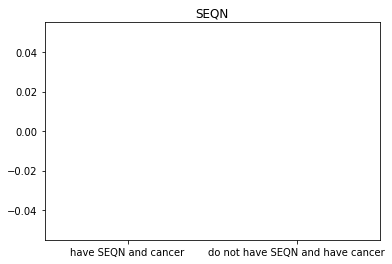

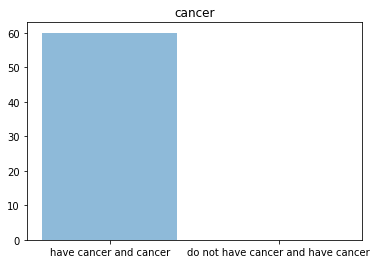

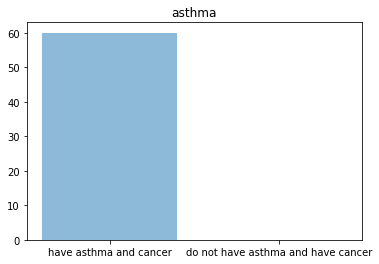

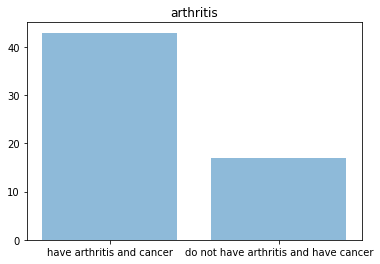

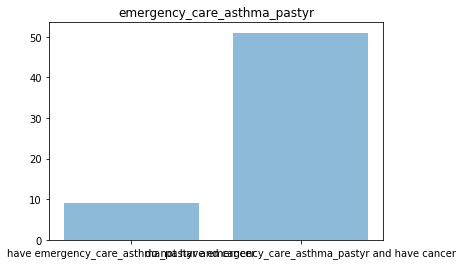

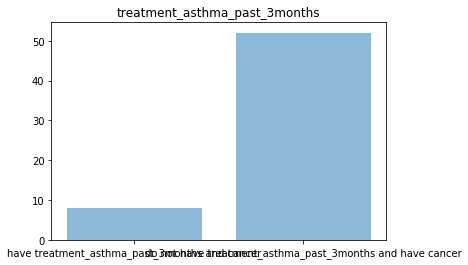

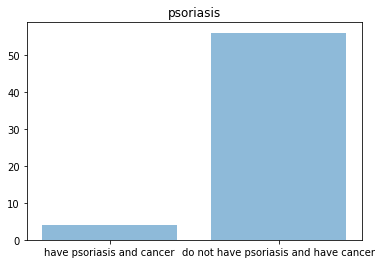

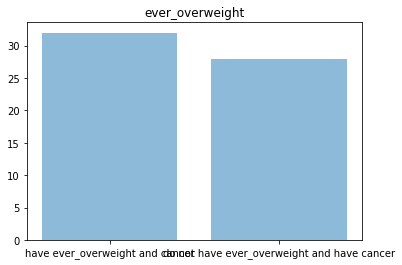

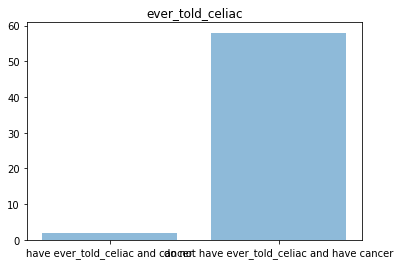

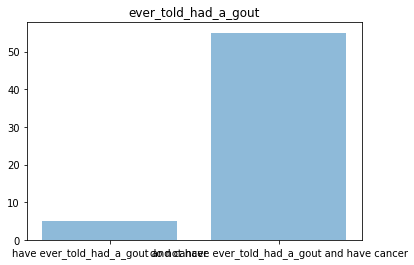

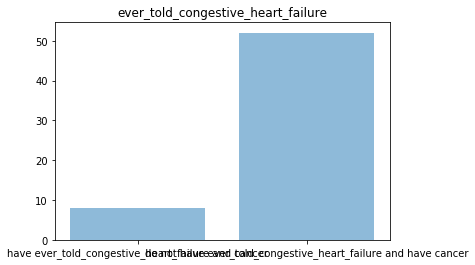

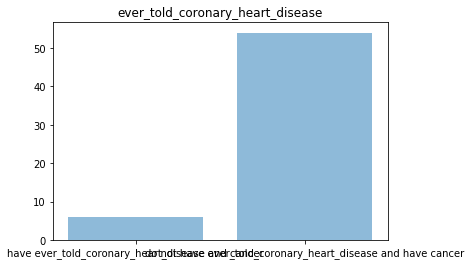

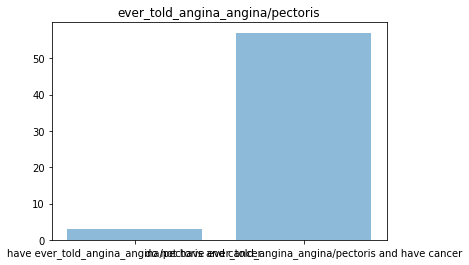

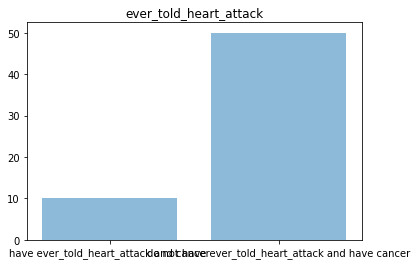

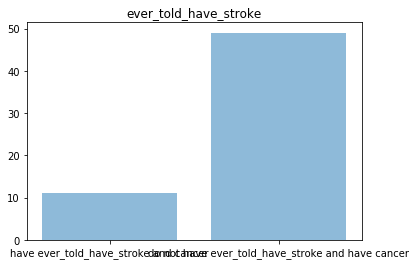

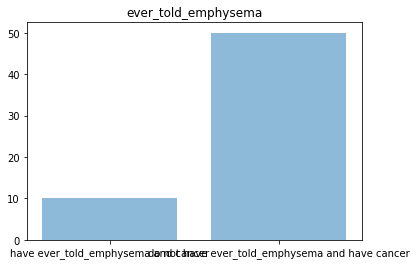

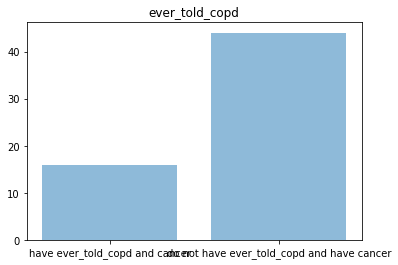

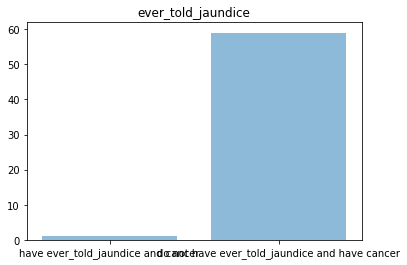

In [286]:
for thing in answers1.columns:
    objects = (f'have {thing} and cancer', f'do not have {thing} and have cancer')
    y_pos = np.arange(len(objects))
    performance = [len(answers1[(answers1[f'{thing}']==1) & (answers1['cancer']==1)][[f'{thing}','cancer']]),
                   len(answers1[(answers1[f'{thing}']==0) & (answers1['cancer']==1)][[f'{thing}','cancer']])]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.title(f'{thing}')
    plt.show()
    
    

In [278]:
answers1.columns

Index(['SEQN', 'cancer', 'asthma', 'arthritis', 'emergency_care_asthma_pastyr',
       'treatment_asthma_past_3months', 'psoriasis', 'ever_overweight',
       'ever_told_celiac', 'ever_told_had_a_gout',
       'ever_told_congestive_heart_failure',
       'ever_told_coronary_heart_disease', 'ever_told_angina_angina/pectoris',
       'ever_told_heart_attack', 'ever_told_have_stroke',
       'ever_told_emphysema', 'ever_told_copd', 'ever_told_jaundice'],
      dtype='object')

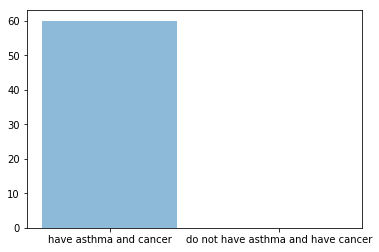

In [280]:
objects = (f'have asthma and cancer', f'do not have asthma and have cancer')
y_pos = np.arange(len(objects))
performance = [len(answers1[(answers1['asthma']==1) & (answers1['cancer']==1)][['asthma','cancer']]),
               len(answers1[(answers1['asthma']==0) & (answers1['cancer']==1)][['asthma','cancer']])]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)

plt.show()

In [185]:
#have arthritis and cancer
len(answers1[(answers1['arthritis']==1) & (answers1['cancer']==1)][['arthritis','cancer']])

43

In [281]:
#have arthritis and not cancer
len(answers1[(answers1['asthma']==1) & (answers1['cancer']==0)][['asthma','cancer']])

453

In [187]:
#dont have aurthritis and have cancer
len(answers1[(answers1['arthritis']==0) & (answers1['cancer']==1)][['arthritis','cancer']])

17

In [282]:
#dont have arthritis and dont have cancer
len(answers1[(answers1['asthma']==0) & (answers1['cancer']==0)][['asthma','cancer']])


0

In [295]:
answers1.drop(['ever_overweight'], axis=1, inplace = True)

In [296]:
answers1.columns

Index(['SEQN', 'cancer', 'asthma', 'arthritis', 'emergency_care_asthma_pastyr',
       'treatment_asthma_past_3months', 'psoriasis', 'ever_told_celiac',
       'ever_told_had_a_gout', 'ever_told_congestive_heart_failure',
       'ever_told_coronary_heart_disease', 'ever_told_angina_angina/pectoris',
       'ever_told_heart_attack', 'ever_told_have_stroke',
       'ever_told_emphysema', 'ever_told_copd', 'ever_told_jaundice'],
      dtype='object')

# diabetes - if want to add later

In [288]:
x = ['DIQ010']
y = ['told_diabetes']
answers1_h=create_df ('DIQ_H.XPT', x,y)

In [ ]:
x = ['DID040']
y = ['age_diagnosed_diabetes']
answersmany_h=create_df2 ('MCQ_H.XPT', x,y)

In [289]:
answers1_h

,SEQN,told_diabetes
0,73557.0,1.0
1,73558.0,1.0
2,73559.0,1.0
3,73560.0,0.0
4,73561.0,0.0
5,73562.0,0.0
6,73564.0,0.0
7,73565.0,0.0
8,73566.0,0.0
9,73567.0,0.0


In [290]:
df1=pd.merge(answers1,answers1_h,how='inner',on='SEQN')

In [291]:
df1

,SEQN,cancer,asthma,arthritis,emergency_care_asthma_pastyr,treatment_asthma_past_3months,psoriasis,ever_overweight,ever_told_celiac,ever_told_had_a_gout,ever_told_congestive_heart_failure,ever_told_coronary_heart_disease,ever_told_angina_angina/pectoris,ever_told_heart_attack,ever_told_have_stroke,ever_told_emphysema,ever_told_copd,ever_told_jaundice,told_diabetes
0,73558.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,73596.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,73615.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,73638.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,73645.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,73654.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,73665.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,73673.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,73677.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9,73702.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


# train test split for just yes or no answer data

In [299]:
w = answers1.drop('cancer',axis=1)
#could have also done answers1.set_index('SEQN') instead of dropping
X = w.drop('SEQN',axis=1)
y = answers1['cancer']

In [300]:
X.head()

,asthma,arthritis,emergency_care_asthma_pastyr,treatment_asthma_past_3months,psoriasis,ever_told_celiac,ever_told_had_a_gout,ever_told_congestive_heart_failure,ever_told_coronary_heart_disease,ever_told_angina_angina/pectoris,ever_told_heart_attack,ever_told_have_stroke,ever_told_emphysema,ever_told_copd,ever_told_jaundice
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [301]:

# importing SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

# applying SMOTE to our data and checking the class counts
#X_resampled, y_resampled = SMOTE().fit_resample(X, y)
#print(sorted(Counter(y_resampled).items()))

In [302]:
from sklearn.model_selection import train_test_split

In [303]:
answers1

,SEQN,cancer,asthma,arthritis,emergency_care_asthma_pastyr,treatment_asthma_past_3months,psoriasis,ever_told_celiac,ever_told_had_a_gout,ever_told_congestive_heart_failure,ever_told_coronary_heart_disease,ever_told_angina_angina/pectoris,ever_told_heart_attack,ever_told_have_stroke,ever_told_emphysema,ever_told_copd,ever_told_jaundice
0,73558.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,73596.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,73615.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,73638.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,73645.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,73654.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,73665.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,73673.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,73677.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9,73702.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [304]:
y.shape

(513,)

In [305]:
#train on the balanced stuff and test on the imbalanced stuff

In [306]:
#use X-resampled and y_resampled if data is imbalanced - if not just use original X and y
#use these variables for the train data - will really just use X_train and y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [307]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [308]:
X_resampled = pd.DataFrame(X_resampled)

In [309]:
y_resampled = pd.DataFrame(y_resampled)

In [310]:
X_resampled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# decision tree

In [311]:
from sklearn.tree import DecisionTreeClassifier

In [312]:
dtree = DecisionTreeClassifier()

In [313]:
dtree.fit(X_resampled,y_resampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# prediction and evaluation

In [314]:
predictions = dtree.predict(X_test)


In [315]:
from sklearn.metrics import classification_report,confusion_matrix

In [316]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87       138
         1.0       0.15      0.25      0.19        16

    accuracy                           0.77       154
   macro avg       0.53      0.54      0.53       154
weighted avg       0.83      0.77      0.80       154



In [317]:
print(confusion_matrix(y_test,predictions))

[[115  23]
 [ 12   4]]


In [318]:
#evaluate accuracy -  got this accuracy evaluation from somewhere random

In [319]:
from sklearn import metrics

In [320]:
metrics.accuracy_score(y_test, predictions)


0.7727272727272727

# tree visualization

In [321]:
grid 

NameError: name 'grid' is not defined

In [322]:
X_resampled.shape

(630, 15)

In [323]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X_resampled.columns)
len(features)

15

In [324]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)


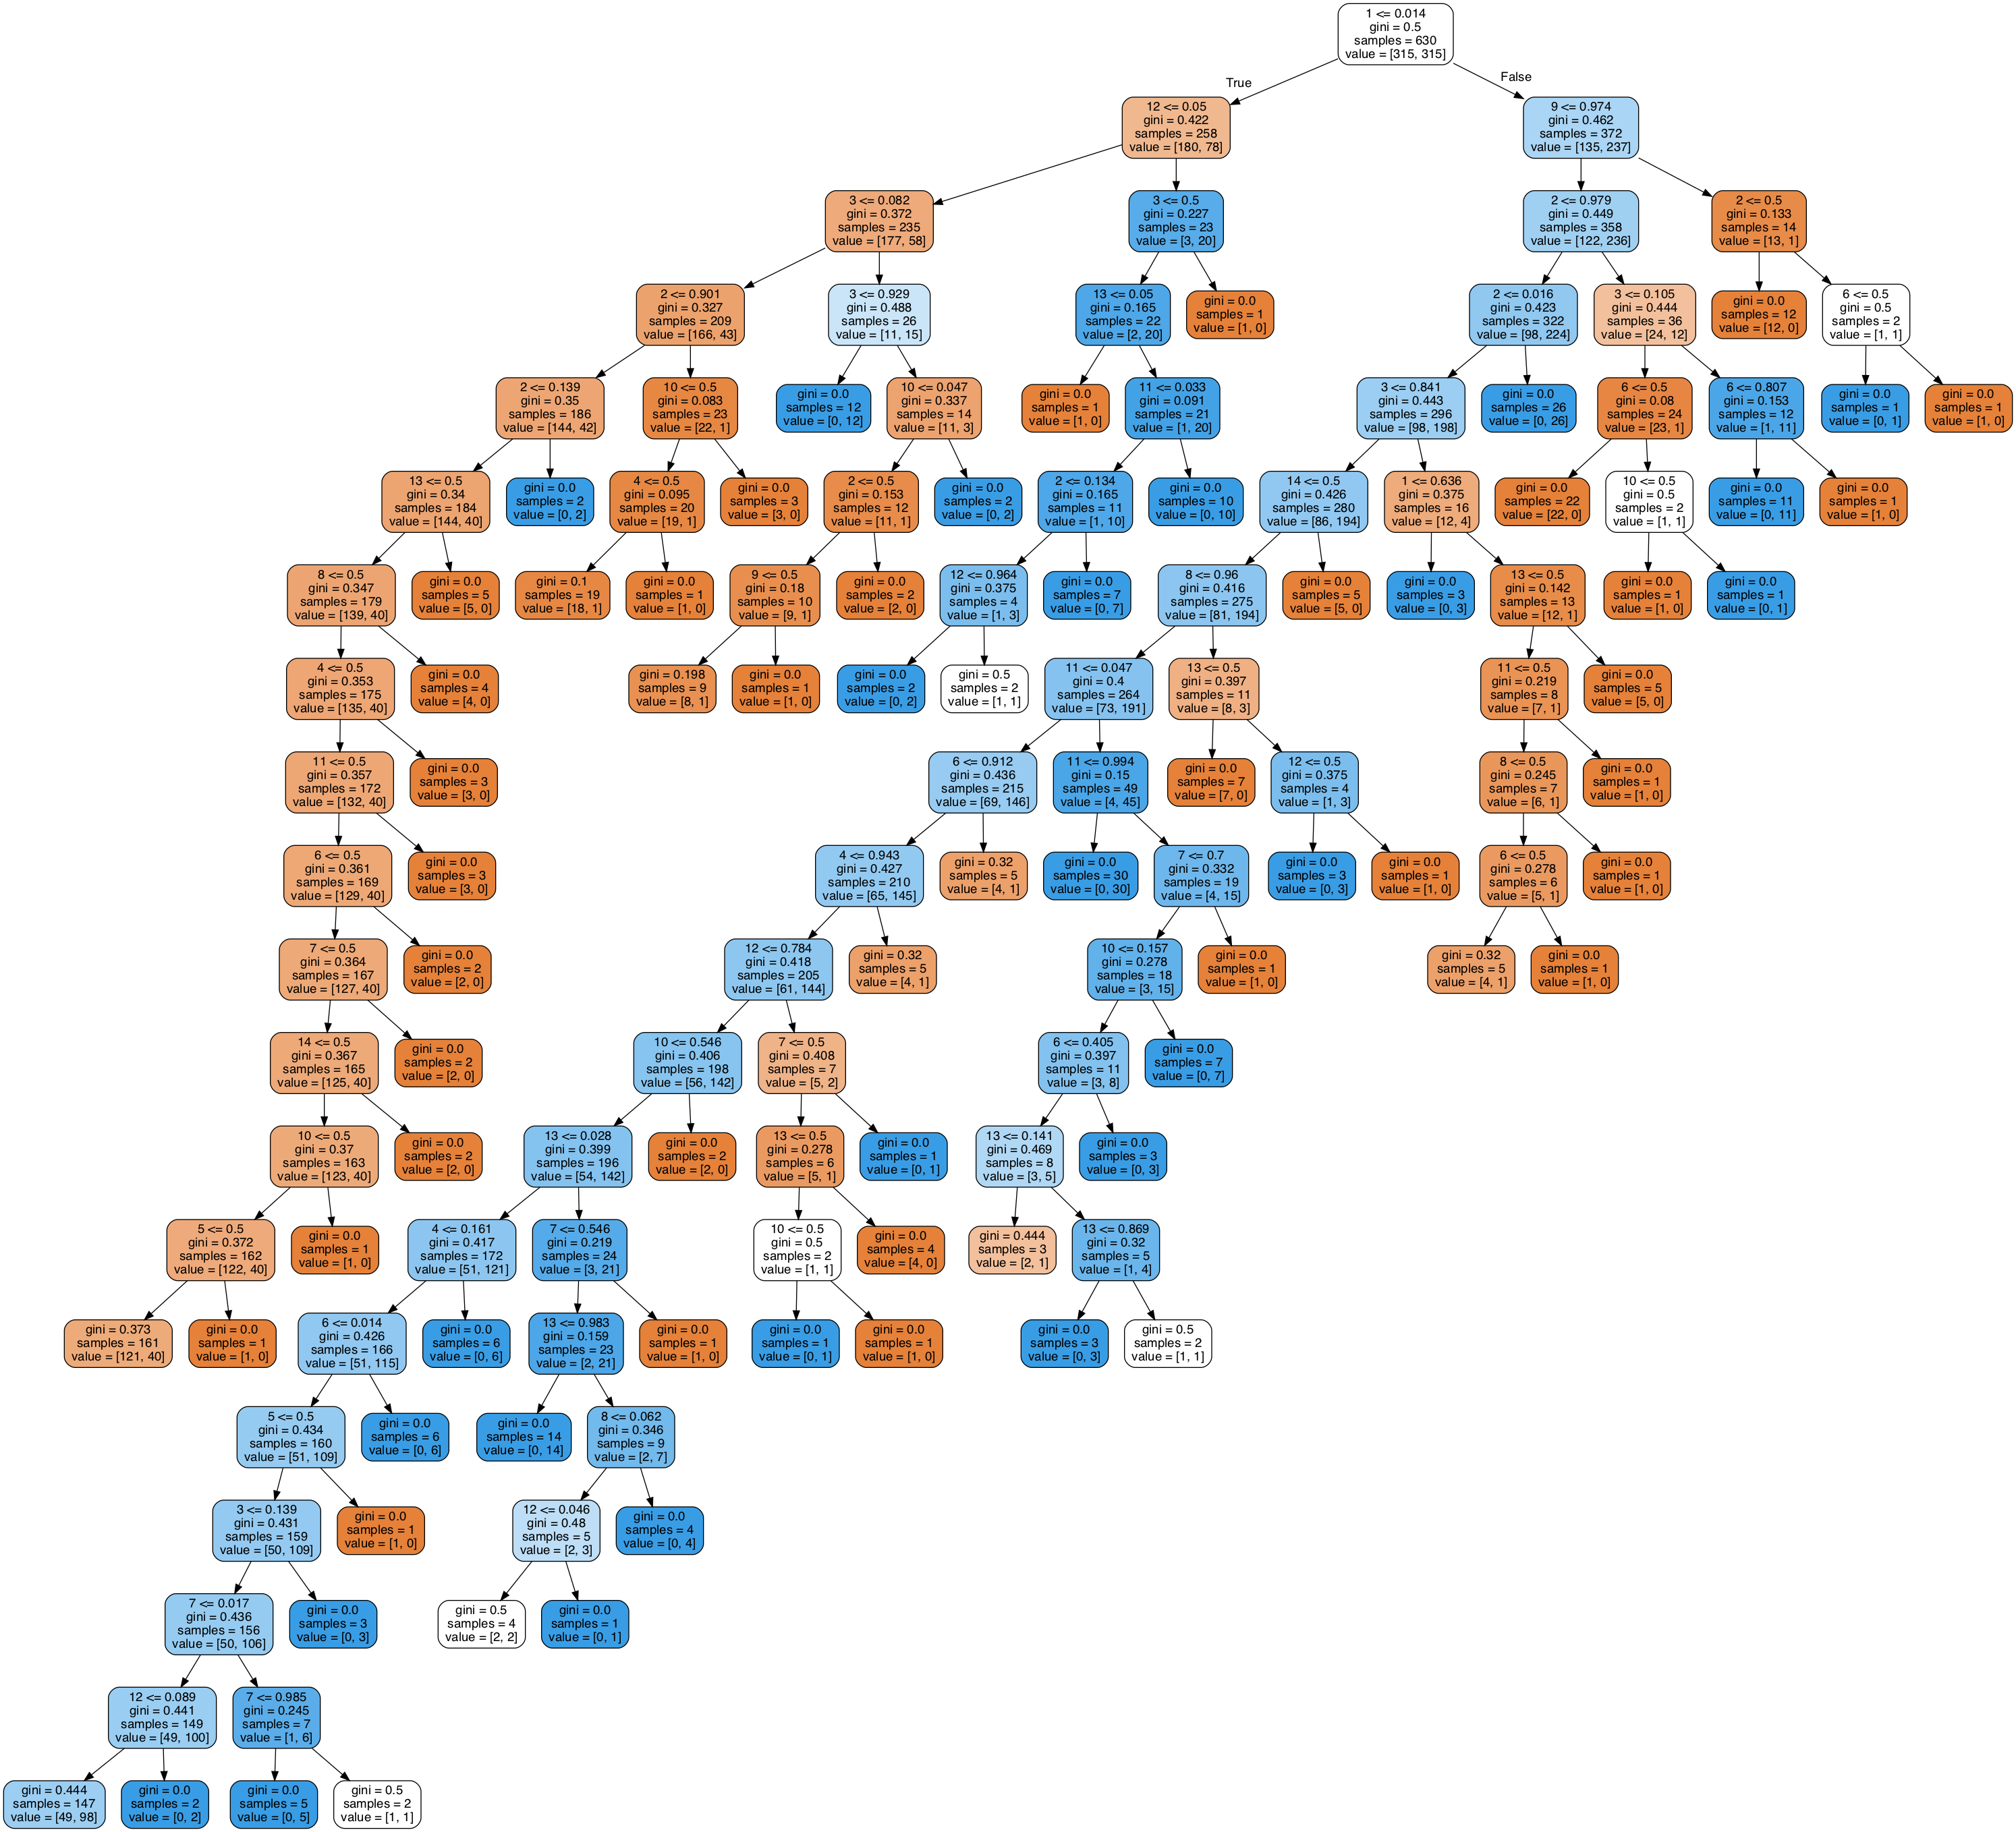

In [325]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

# Grid Search for tree

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [327]:
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, X_resampled, y_resampled, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 79.21%


In [328]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6,7,8,9,10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [329]:
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_resampled, y_resampled)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [330]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 77.67%
Mean Test Score: 80.52%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 15}

# Putting new parameters back in tree

In [ ]:
#when using the tree from the grid search

In [345]:
dtree = DecisionTreeClassifier(criterion='gini',
 max_depth=5,
 min_samples_leaf=1,
 min_samples_split=15)
dtree.fit(X_resampled,y_resampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [346]:
#testing predictions

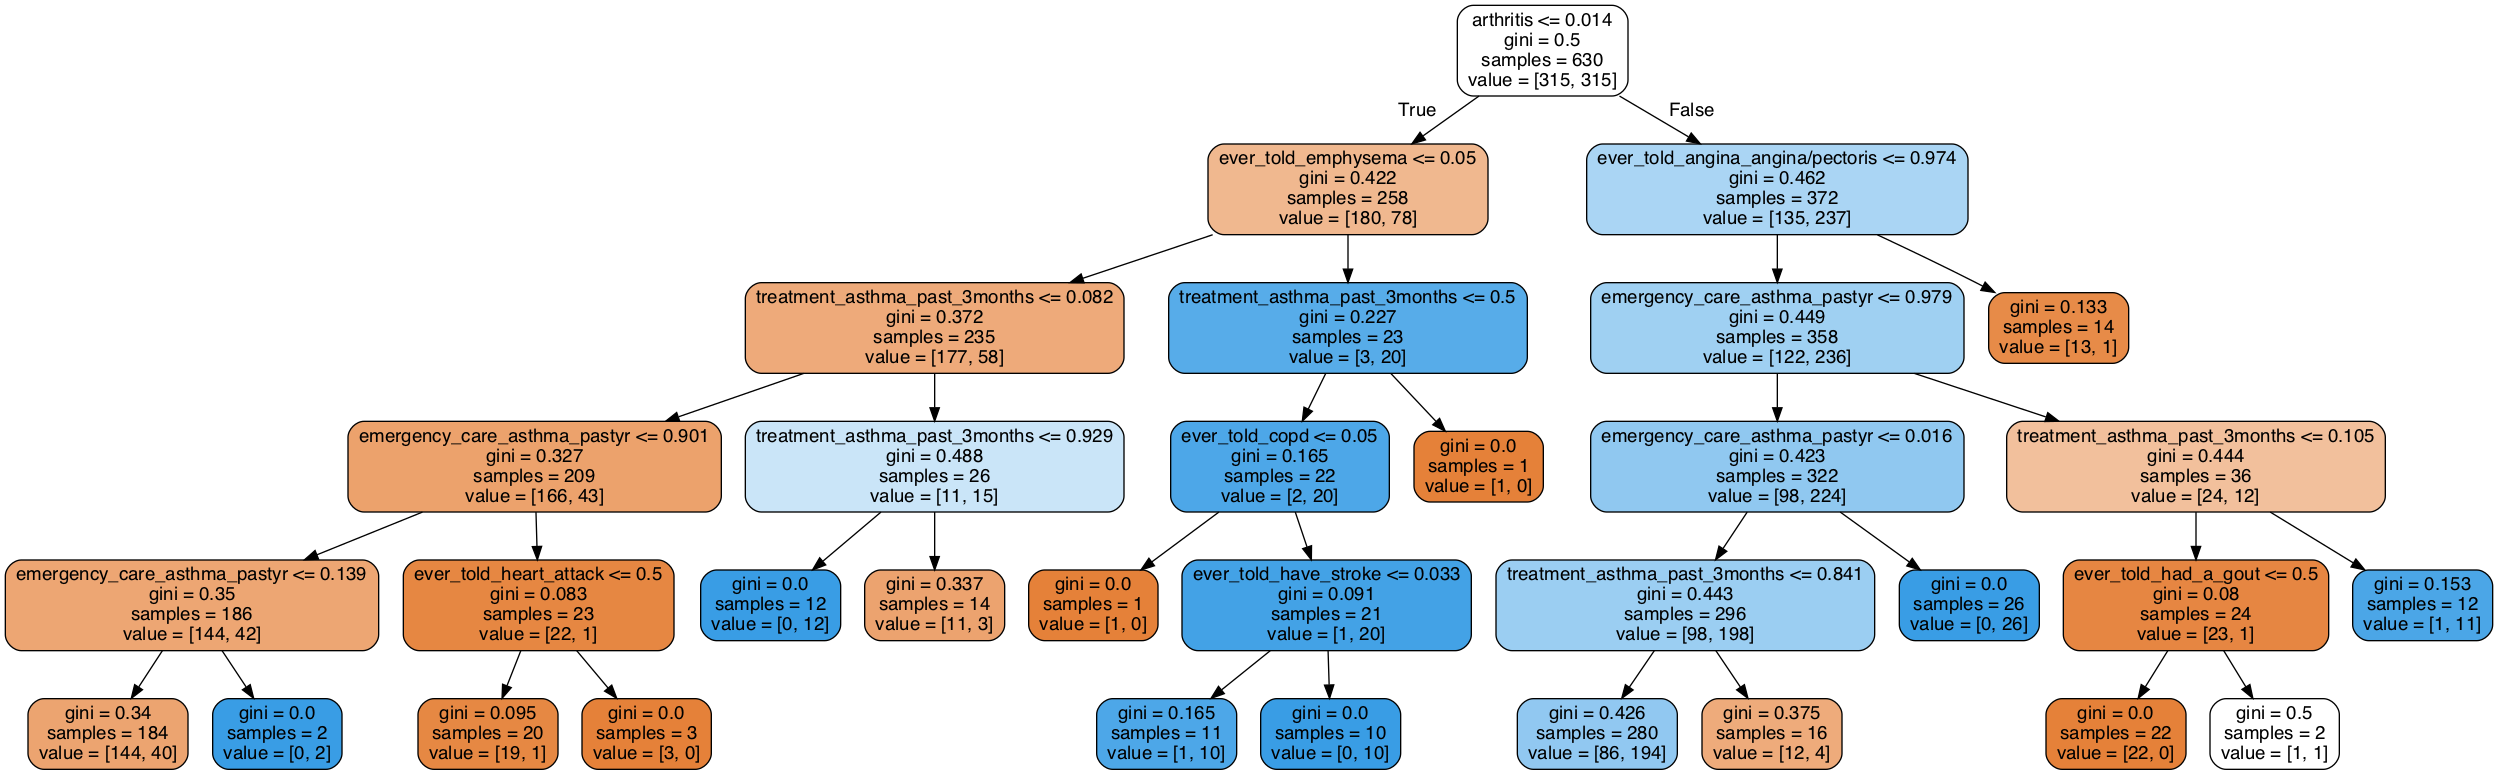

In [347]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
features = list(X.columns)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [348]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87       138
         1.0       0.15      0.25      0.19        16

    accuracy                           0.77       154
   macro avg       0.53      0.54      0.53       154
weighted avg       0.83      0.77      0.80       154



In [349]:
metrics.accuracy_score(y_test, predictions)


0.7727272727272727

# XGBoost

In [231]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [247]:
w = answers1.drop('cancer',axis=1)
#could have also done answers1.set_index('SEQN') instead of dropping
X = w.drop('SEQN',axis=1)
y = answers1['cancer']

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [249]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [252]:
y_resampled = pd.DataFrame(y_resampled)

In [254]:
X_resampled = pd.DataFrame(X_resampled, columns= X_test.columns)

In [256]:
clf = XGBClassifier()

In [257]:
# Instantiate XGBClassifier
clf.fit(X_resampled, y_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [259]:
# Predict on training and test sets
training_preds = clf.predict(X_resampled)
test_preds = clf.predict(X_test)

In [260]:

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_resampled, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 50.0%
Validation accuracy: 87.01%


# XGBoost from medium article
#https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7

In [261]:
from sklearn import datasets
import xgboost as xgb

In [262]:
w = answers1.drop('cancer',axis=1)
#could have also done answers1.set_index('SEQN') instead of dropping
X = w.drop('SEQN',axis=1)
y = answers1['cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
y_resampled = pd.DataFrame(y_resampled)
X_resampled = pd.DataFrame(X_resampled, columns = X_test.columns)

In [263]:
D_train = xgb.DMatrix(X_resampled, label=y_resampled)
D_test = xgb.DMatrix(X_test, label=y_test)

In [264]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

In [265]:
model = xgb.train(param, D_train, steps)


In [266]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.5865196078431373
Recall = 0.6317164179104477
Accuracy = 0.7662337662337663


# SVM

In [ ]:
#for data without the continuous stuff - only has the yes or no answers

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split  
from time import time

In [160]:
from sklearn.svm import SVC  
tic = time()
svclassifier = SVC(kernel='rbf', C=1000)  
svclassifier.fit(X_resampled, y_resampled) 
y_pred = svclassifier.predict(X_test)
toc = time()
print("run time is {} seconds".format(toc-tic))

run time is 0.016788005828857422 seconds


In [161]:
#these are the predictions for each thing in the training set
y_pred

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [162]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

[[119  18]
 [ 11   6]]
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89       137
         1.0       0.25      0.35      0.29        17

    accuracy                           0.81       154
   macro avg       0.58      0.61      0.59       154
weighted avg       0.84      0.81      0.83       154

The accuracy score is 0.8116883116883117
